&emsp;&emsp;如果一味追求对训练数据的预测能力,所选的模型的复杂度则往往会比真实模型更高.这种现象
称为过拟合(over-fitting).过拟合是指学习时选择的模型包含的参数过多,以致出现这一模型对已知数据预测
得很好,但对未知数据预测得很差的现象,可以说模型选择旨在避免过拟合并提高模型的预测能力.与过拟合相对的是
欠拟合(under-fitting),这是指训练样本的一般性质尚未学好.     
&emsp;&emsp;当模型的复杂度增大时,训练误差逐渐减小并趋向于0;而测试误差会先减少,达到最小值后又增大,当
选择的模型复杂度过大时,过拟合现象就会发生.

<img src="../../../../Other/img/训练误差和测试误差与模型复杂度的关系.png" style="width:400px;height:300px;float:bottom">

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

In [19]:
np.random.seed(666)
x = np.linspace(-3, 3, 200).reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=200).reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) # 留出法划分数据集

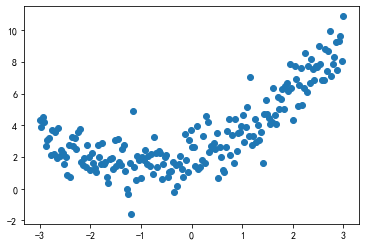

In [20]:
plt.scatter(x, y)
plt.show()

In [21]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
lin_reg.score(x_train, y_train) # 可决系数(R平方)

0.5037972297955613

In [22]:
y_predict = lin_reg.predict(x_test)
mean_squared_error(y_test, y_predict) # 测试数据的均方误差

2.4182444615147505

In [23]:
x_test.flatten()

array([-0.43718593,  1.19095477,  2.30653266,  0.28643216, -0.46733668,
        1.04020101, -1.79396985, -0.94974874,  1.25125628,  1.01005025,
       -1.31155779, -3.        , -1.22110553,  0.49748744, -0.55778894,
        1.22110553, -0.82914573, -1.73366834, -1.85427136,  1.88442211,
        0.01507538, -1.34170854, -1.13065327,  1.85427136,  1.7638191 ,
       -0.28643216,  2.27638191,  0.70854271,  2.24623116, -1.49246231,
       -2.15577889,  2.39698492, -0.10552764, -2.75879397,  2.96984925,
        2.87939698,  2.36683417,  1.16080402,  1.10050251,  2.18592965])

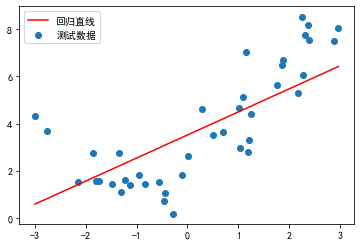

In [24]:
plt.scatter(x_test, y_test, label='测试数据')
plt.plot(np.sort(x_test.flatten()), y_predict[np.argsort(x_test.flatten())],
         color='r', label='回归直线') # 欠拟合(使用线性回归)
plt.legend()
plt.show()

In [25]:
def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

In [26]:
poly2_reg = PolynomialRegression(degree=2) # 次数为2的多项式拟合
poly2_reg.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [27]:
y2_predict = poly2_reg.predict(x_test)
mean_squared_error(y_test, y2_predict) # 测试数据集均方误差比使用线性回归低

1.1120992087861084

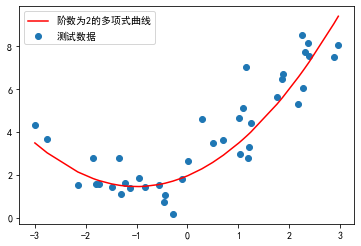

In [28]:
plt.scatter(x_test, y_test, label='测试数据')
plt.plot(np.sort(x_test.flatten()), 
         y2_predict[np.argsort(x_test.flatten())], color='red', label='阶数为2的多项式曲线') # 拟合效果较好
plt.legend()
plt.show()

In [29]:
poly10_reg = PolynomialRegression(degree=10) # 次数为10的多项式拟合
poly10_reg.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=10, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [30]:
y10_predict = poly10_reg.predict(x_test)
mean_squared_error(y_test, y10_predict)

1.3179062220827944

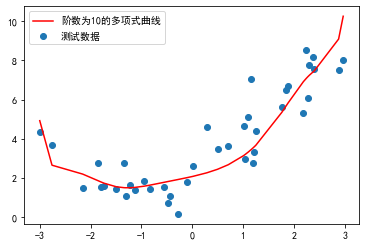

In [31]:
plt.scatter(x_test, y_test, label='测试数据')
plt.plot(np.sort(x_test.flatten()), 
         y10_predict[np.argsort(x_test.flatten())], color='red', label='阶数为10的多项式曲线')
plt.legend()
plt.show()

In [32]:
poly100_reg = PolynomialRegression(degree=100) # 次数为100的多项式拟合
poly100_reg.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=100, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [33]:
y100_predict_train = poly100_reg.predict(x_train)
error_train = mean_squared_error(y_train, y100_predict_train) # 训练数据集均方误差较小
print(error_train)

y100_predict = poly100_reg.predict(x_test)
error_test = mean_squared_error(y_test, y100_predict) # 测试数据集均方误差较大(过拟合)
print(error_test)

1.921579303569714
211241474.30200657


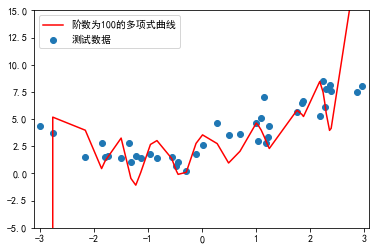

In [35]:
plt.scatter(x_test, y_test, label='测试数据')
plt.plot(np.sort(x_test.flatten()), 
         y100_predict[np.argsort(x_test.flatten())], color='red', label='阶数为100的多项式曲线') # 过拟合
plt.legend()
plt.xlim(-3.1, 3.1)
plt.ylim(-5, 15)
plt.show()
